# Anomaly detection with Autoencoder

In [0]:
# !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive/"
# base_dir = root_dir + 'dashlink/'

In [0]:
from fastai.vision import *
import torchvision
import torchvision.transforms as T
from torchvision import datasets
import torch

In [0]:
trnpath = Path(base_dir + 'Tail_687_1'); trnpath

PosixPath('/content/gdrive/My Drive/dashlink/Tail_687_1')

In [0]:
# set output folder
outpath = Path('png4a'); outpath

PosixPath('png4a')

In [0]:
# path.ls()
! ls -alh "{trnpath}"/{outpath}

total 19M
-rw------- 1 root root  19M Sep  3 13:32 autoencoder-3.pth
drwx------ 2 root root 4.0K Sep  3 14:07 non
drwx------ 2 root root 4.0K Sep  3 14:07 non-1
drwx------ 2 root root 4.0K Sep  2 19:48 non-5
drwx------ 2 root root 4.0K Sep  3 14:07 typ
drwx------ 2 root root 4.0K Sep  3 14:07 typ-1
drwx------ 2 root root 4.0K Sep  2 19:49 typ-5


## Data

---



In [0]:
#https://cs230-stanford.github.io/pytorch-vision.html
from PIL import Image
import PIL.ImageOps
from torch.utils.data import Dataset, DataLoader

class AutoencoderDataset(Dataset):
  def __init__(self, data_dir, transform):      
    # store filenames
    self.filenames = os.listdir(data_dir)
    self.filenames = [os.path.join(data_dir, f) for f in self.filenames] 
    self.transform = transform
      
  def __len__(self):
    # return size of dataset
    return len(self.filenames)
      
  def __getitem__(self, idx):
    # open image, convert from 4 to 3 channels, apply transforms, and return
  
    png = Image.open(self.filenames[idx])
    
    r,g,b,a = png.split()
    rgb_img = Image.merge('RGB', (r,g,b))
    out = rgb_img
    
    out = out.convert('L') #Luminosity, only 1 channel
    out = PIL.ImageOps.invert(out) #invert
    
    out = self.transform(out)
    return np.array(out)

In [0]:
bs = 8
# bs = 16
# bs = 32

### Create Tentative Dataset

In [0]:
# #Compose means applied in a sequence
# tent_transform = T.Compose([T.Resize([128,128]), T.ToTensor()])

In [0]:
# # tent_dataset = datasets.ImageFolder(str(traindir), tent_transform)
# tent_dataset = AutoencoderDataset(str(trnpath/'png4a'/'typ'), tent_transform)
# len(tent_dataset)

In [0]:
# print(tent_dataset[0].shape)
# print(type(tent_dataset[0]))

### Create Tentative DataLoader

In [0]:
# tent_loader =  torch.utils.data.DataLoader(tent_dataset, batch_size=bs, shuffle=True, num_workers=2)

In [0]:
# len(tent_loader.dataset)

### Normalize data

In [0]:
# for i in range(len(il)):
#   if(i==2): break
#   numpy_image = il[i].data.cpu().data.numpy(); print(numpy_image)
#   #numpy_image = xb[0].cpu().data.numpy(); print(numpy_image)
# #   batch_mean = np.mean(numpy_image, axis=(0,2,3))
# #   batch_std = np.std(numpy_image, axis=(0,2,3))

# il[0].data

# xb,yb = iter(data.train_dl.dl).next()
# print(f'len(xb[1]): {len(xb[1])}')
# # print(f'type(xb[0]): {type(xb[0])}')
# # xb[0]

#### Experiment with one batch of toy data

In [0]:
# ib = torch.tensor([[[[1,1],
#                      [1,1],
#                      [1,1]],
#                     [[2,2],
#                      [2,2],
#                      [2,2]],
#                     [[3,3],
#                      [3,3],
#                      [3,3]]],
#                    [[[4,4],
#                      [4,4],
#                      [4,4]],
#                     [[5,5],
#                      [5,5],
#                      [5,5]],
#                     [[6,6],
#                      [6,6],
#                      [6,6]]]]); ib

In [0]:
# numpy_ib = ib.cpu().data.numpy()
# np.sum(numpy_ib, axis=(0,2,3), keepdims=True)

#### Experiment with one batch of real data

In [0]:
# xb = iter(tent_loader).next()
# xb_np = xb.cpu().data.numpy(); print(xb_np.shape)
# #xb_np_mean = np.mean(xb_np, axis=(0,2,3), keepdims=True); print(xb_np_mean.shape)
# xb_np_mean = np.mean(xb_np, axis=(0,2,3)); print(xb_np_mean.shape)
# xb_np_std = np.std(xb_np, axis=(0,2,3)); print(xb_np_std.shape)
# xb_np_mean,xb_np_std

#### Normalize the real data

In [0]:
# pop_mean = []
# pop_std = []
# for xb in tent_loader:
#   xb_np = xb.cpu().data.numpy(); #print(xb_np.shape)
#   xb_np_mean = np.mean(xb_np, axis=(0,2,3)); #print(xb_np_mean.shape)
#   xb_np_std = np.std(xb_np, axis=(0,2,3)); #print(xb_np_std.shape)
#   pop_mean.append(xb_np_mean)
#   pop_std.append(xb_np_std)
# pop_mean = np.array(pop_mean)
# pop_std = np.array(pop_std)

# pop_mean = pop_mean.mean(axis=0)
# pop_std = pop_std.mean(axis=0)
# print(pop_mean, pop_std)

In [0]:
# print(pop_mean, pop_std)

### Create Datasets

#### Normal

In [0]:
#Compose means applied in a sequence
# train_transform = T.Compose([T.Resize([128,128]), T.ToTensor(), T.Normalize(pop_mean, pop_std)])
train_transform = T.Compose([T.Resize([128,128]), T.ToTensor()])

In [0]:
# norm_dataset = AutoencoderDataset(str(trnpath/'png4a'/'typ'), train_transform)
norm_dataset = AutoencoderDataset(str(trnpath/outpath/'typ'), train_transform)
len(norm_dataset)

474

In [0]:
norm_dataset[0].shape

(1, 128, 128)

##### Split into train/valid

In [0]:
train_size = int(0.8*len(norm_dataset)); print(train_size)
valid_size = len(norm_dataset) - train_size; print(valid_size)

379
95


In [0]:
train_norm_dataset,valid_norm_dataset = torch.utils.data.random_split(
    norm_dataset, [train_size, valid_size])
len(train_norm_dataset),len(valid_norm_dataset)

(379, 95)

#### Anomalous

In [0]:
# anom_dataset = AutoencoderDataset(str(trnpath/'png4a'/'non'), train_transform)
anom_dataset = AutoencoderDataset(str(trnpath/outpath/'non'), train_transform)
len(anom_dataset)

81

In [0]:
anom_dataset[0].shape

(1, 128, 128)

### Create DataLoaders

In [0]:
# norm_loader = torch.utils.data.DataLoader(norm_dataset, batch_size=bs, shuffle=True)
train_norm_loader = torch.utils.data.DataLoader(train_norm_dataset, batch_size=bs, shuffle=True)
valid_norm_loader = torch.utils.data.DataLoader(valid_norm_dataset, batch_size=bs, shuffle=False)

In [0]:
anom_loader = torch.utils.data.DataLoader(anom_dataset, batch_size=bs, shuffle=True)

### Show a batch of normal images

In [0]:
# def show_random_batch():
#   X = iter(train_norm_loader).next(); print(X.shape)
#   Y = iter(anom_loader).next(); print(Y.shape)  
#   # X = X[0].unsqueeze(0); print(X.shape)
#   ##X_flat = X.view(X.size(0), -1); print(X_flat.shape)
#   ##Yh_flat = autoencoder(X_flat.cuda()); print(Yh_flat.shape)
#   ##Yh = Yh_flat.view(X.size(0), 1, 128, 128); print(Yh.shape)

#   ### Yh = autoencoder(X.cuda()); print(Yh.shape)

#   #prepare for visualization
#   X_vis = X.numpy(); print(X_vis.shape)
#   Y_vis = Y.numpy(); print(Y_vis.shape)  
#   ##Yh_vis = Yh.detach().cpu().numpy(); print(Yh_vis.shape)
  
#   #visualize; train normal in top row, anomalous in bottom row
#   ##fig,axes = plt.subplots(nrows=2, ncols=8, sharex=True, sharey=True, figsize=(20,4))
#   fig,axes = plt.subplots(nrows=2, ncols=8, sharex=True, sharey=True, figsize=(20,4))
#   ##for X_vis,row in zip([X_vis, Yh_vis], axes):
#   for X_vis,row in zip([X_vis, Y_vis], axes):
#     #for img,ax in zip(X_vis, row):
#     for img,ax in zip(X_vis, row):
#       ax.imshow(np.squeeze(img), cmap='gray')
#       ax.get_xaxis().set_visible(False)
#       ax.get_yaxis().set_visible(False)  

In [0]:
# show_random_batch()

In [0]:
def show_random_batch(loader, loader_name):
  xb = iter(loader).next(); print(xb.shape)
  images = torchvision.utils.make_grid(xb); print(images.shape)
  images = np.transpose(images, (1,2,0)); print(images.shape)
  plt.figure(figsize=(16,12))
  plt.title(f'Random batch from loader: {loader_name}')
  plt.imshow(images)
  plt.show() 

torch.Size([8, 1, 128, 128])
torch.Size([3, 132, 1042])
torch.Size([132, 1042, 3])


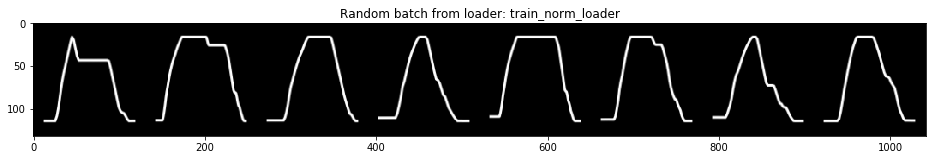

torch.Size([8, 1, 128, 128])
torch.Size([3, 132, 1042])
torch.Size([132, 1042, 3])


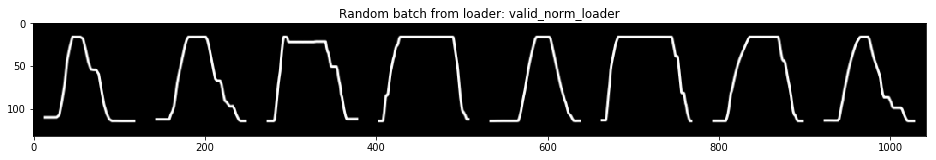

torch.Size([8, 1, 128, 128])
torch.Size([3, 132, 1042])
torch.Size([132, 1042, 3])


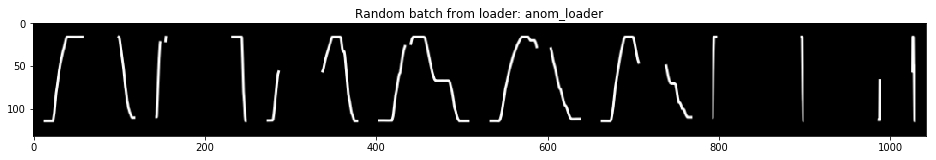

In [0]:
show_random_batch(train_norm_loader, 'train_norm_loader')
show_random_batch(valid_norm_loader, 'valid_norm_loader')
show_random_batch(anom_loader, 'anom_loader')

## Model

In [0]:
class LinearAutoencoder(nn.Module):
  def __init__(self, encoding_dim):
    super(LinearAutoencoder, self).__init__()
    #encoder
    self.fc1e = nn.Linear(1*128*128, encoding_dim)
    #self.fc2e = nn.Linear(1024, encoding_dim)

    #decoder
    #self.fc2d = nn.Linear(encoding_dim, 1024)
    self.fc1d = nn.Linear(encoding_dim, 1*128*128)
    
  def forward(self, x):
    x = F.relu(self.fc1e(x))
    #x = F.relu(self.fc2e(x))
    
    #x = F.relu(self.fc2d(x))
    x = torch.sigmoid(self.fc1d(x)) #scaling from 0 to 1
    return x

In [0]:
class ConvAutoencoder(nn.Module):
  def __init__(self):
    super(ConvAutoencoder, self).__init__()
    #input signal: 3 x 32 x 32
    #self.conv1e = nn.Conv2d(  3,  24, 3, padding=2) #24 x 30 x 30
    self.conv1e = nn.Conv2d(  1,  24, 3, padding=2) #24 x 30 x 30
    self.conv2e = nn.Conv2d( 24,  48, 3, padding=2) #48 x 28 x 28
    self.conv3e = nn.Conv2d( 48,  96, 3, padding=2) #96 x 26 x 26
    self.conv4e = nn.Conv2d( 96, 128, 3, padding=2) #128 x 24 x 24
    self.conv5e = nn.Conv2d(128, 256, 3, padding=2) #256 x 22 x 22
    self.mp1e   = nn.MaxPool2d(2, return_indices=True) #256 x 11 x 11

    self.mp1d   = nn.MaxUnpool2d(2)
    self.conv5d = nn.ConvTranspose2d(256, 128, 3, padding=2)
    self.conv4d = nn.ConvTranspose2d(128,  96, 3, padding=2)
    self.conv3d = nn.ConvTranspose2d( 96,  48, 3, padding=2)
    self.conv2d = nn.ConvTranspose2d( 48,  24, 3, padding=2)
    #self.conv1d = nn.ConvTranspose2d( 24,   3, 3, padding=2)
    self.conv1d = nn.ConvTranspose2d( 24,   1, 3, padding=2)
    
  def forward(self, x):
    #Encoder
    x = F.relu(self.conv1e(x))
    x = F.relu(self.conv2e(x))
    x = F.relu(self.conv3e(x))
    x = F.relu(self.conv4e(x))
    x = F.relu(self.conv5e(x))
    x,i = self.mp1e(x)
    #Decoder
    x = self.mp1d(x, i)
    x = F.relu(self.conv5d(x))
    x = F.relu(self.conv4d(x))
    x = F.relu(self.conv3d(x))
    x = F.relu(self.conv2d(x))
    x = F.relu(self.conv1d(x))    
    return x

In [0]:
class ConvAutoencoder2(nn.Module):
  def __init__(self):
    super(ConvAutoencoder2, self).__init__()
    #encoder
    self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
    self.conv2 = nn.Conv2d(32, 8, 3, padding=1)
    self.pool = nn.MaxPool2d(2, 2)    
    #decoder
    self.t_conv1 = nn.ConvTranspose2d(8, 32, 2, stride=2)
    self.t_conv2 = nn.ConvTranspose2d(32, 1, 2, stride=2)
    
  def forward(self, x):
    #Encoder
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    #Decoder
    x = F.relu(self.t_conv1(x))
    x = torch.sigmoid(self.t_conv2(x))
    return x

In [0]:
# learning_rate = 1e-3 #.973
# learning_rate = 2e-3 #
learning_rate = 3e-3 #
# learning_rate = 5e-3 #
# learning_rate = 1e-2 #

In [0]:
# autoencoder = LinearAutoencoder(16).cuda() #.91
# autoencoder = LinearAutoencoder(24).cuda() #.89
# autoencoder = LinearAutoencoder(28).cuda() #.86
# autoencoder = LinearAutoencoder(32).cuda() #.88
# autoencoder = LinearAutoencoder(36).cuda() #.88
# autoencoder = LinearAutoencoder(40).cuda() #.89
# autoencoder = LinearAutoencoder(44).cuda() #.87
# autoencoder = LinearAutoencoder(48).cuda() #.87
# autoencoder = LinearAutoencoder(52).cuda() #.86
# autoencoder = LinearAutoencoder(56).cuda() #.86
# autoencoder = LinearAutoencoder(60).cuda() #.855
# autoencoder = LinearAutoencoder(64).cuda() #.84
# autoencoder = LinearAutoencoder(68).cuda() #.85
# autoencoder = LinearAutoencoder(72).cuda() #.84
# autoencoder = LinearAutoencoder(76).cuda() #.85
# autoencoder = LinearAutoencoder(80).cuda() #.84
# autoencoder = LinearAutoencoder(84).cuda() #.85
# autoencoder = LinearAutoencoder(88).cuda() #.84
# autoencoder = LinearAutoencoder(92).cuda() #.84
# autoencoder = LinearAutoencoder(96).cuda() #.84
# autoencoder = LinearAutoencoder(100).cuda() #.84
# autoencoder = LinearAutoencoder(104).cuda() #.84
# autoencoder = LinearAutoencoder(108).cuda() #.84
# autoencoder = LinearAutoencoder(112).cuda() #.84
# autoencoder = LinearAutoencoder(116).cuda() #.84
# autoencoder = LinearAutoencoder(120).cuda() #.84
# autoencoder = LinearAutoencoder(124).cuda() #.84
# autoencoder = LinearAutoencoder(128).cuda() #.84
# autoencoder = LinearAutoencoder(136).cuda() #.84
# autoencoder = LinearAutoencoder(142).cuda() #.83
autoencoder = LinearAutoencoder(150).cuda() #.82
# autoencoder = LinearAutoencoder(158).cuda() #.83
# autoencoder = LinearAutoencoder(166).cuda() #.83
# autoencoder = LinearAutoencoder(174).cuda() #.83
# autoencoder = LinearAutoencoder(182).cuda() #.82
# autoencoder = LinearAutoencoder(190).cuda() #.84
# autoencoder = LinearAutoencoder(198).cuda() #.83

# autoencoder = LinearAutoencoder(228).cuda() #.82
# autoencoder = LinearAutoencoder(256).cuda() #.83
# autoencoder = LinearAutoencoder(512).cuda() #.82
# autoencoder = LinearAutoencoder(1024).cuda() #.87

# autoencoder = ConvAutoencoder().cuda()
# autoencoder = ConvAutoencoder2().cuda()
print(autoencoder)

LinearAutoencoder(
  (fc1e): Linear(in_features=16384, out_features=150, bias=True)
  (fc1d): Linear(in_features=150, out_features=16384, bias=True)
)


In [0]:
# parameters = list(autoencoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=learning_rate)

## Train on normal images

In [0]:
def show_img(orig, reconstructed):
    fig=plt.figure()
    
#     orig = orig.swapaxes(0, 1).swapaxes(1, 2)
#     reconstructed = reconstructed.swapaxes(0, 1).swapaxes(1, 2)
    
    # Normalize for display purpose
#     orig     = (orig - orig.min()) / (orig.max() - orig.min())
#     reconstructed = (reconstructed - reconstructed.min()) / (reconstructed.max() - reconstructed.min())
    
    fig.add_subplot(1, 3, 1, title='Original')
    plt.imshow(orig)
    
    fig.add_subplot(1, 3, 3, title='Reconstructed')
    plt.imshow(reconstructed)
    
    fig.subplots_adjust(wspace = 0.5)
    plt.show()
    
# To test
# show_img(cifar10_train[0][0].numpy(), cifar10_train[1][0].numpy(), cifar10_train[2][0].numpy())

In [0]:
# xb = iter(train_norm_loader).next(); print(xb.shape, xb.size(0))
# xb = xb.view(xb.size(0), -1); print(xb.shape)

In [0]:
# # type(xb)
# # xb = xb.type('torch.FloatTensor')
# xb = xb.cuda()
# yhb = autoencoder(xb); print(yhb.shape, type(yhb))
# # orig = xb[0].cpu()
# # reconstructed = yhb[0].cpu()
# # show_img(orig.data.numpy(), reconstructed.data.numpy())

In [0]:
# orig = xb[0].view(130, 130, 1).cpu(); print(orig.shape)
# orig.data.numpy

In [0]:
# show_img(orig.data.numpy(), orig.data.numpy())

In [0]:
train_loss = []
valid_loss = []

In [0]:
epochs = 20
# train_loss = []
# valid_loss = []
for epoch in range(1, epochs+1):
#     if(epoch==20): break

    # Let's train the model
    total_trn_loss = 0.0
    total_trn_iter = 0
    #train_loss = 0.0
    autoencoder.train()
    for i,xb in enumerate(train_norm_loader):
        xb = xb.view(xb.size(0), -1) #for 1D to flatten image into vector
        xb = xb.cuda()
        optimizer.zero_grad()
        yhb = autoencoder(xb)
        
        loss = loss_func(yhb, xb)
        loss.backward()
        optimizer.step()
        
        total_trn_iter += 1
        total_trn_loss += loss.item()
        #train_loss += loss.item()*xb.size(0)
        #train_loss += loss.item()
        #print('Batch: {} \ttrain_loss: {:.6f}'.format(i, loss.item()))
    #print avg train stats
    #train_loss = train_loss/len(train_norm_loader)
    #print('----Epoch: {} \tavg train_loss: {:.6f}'.format(epoch, train_loss/(i+1)))
    
    # Let's record the validation loss
    total_val_loss = 0.0
    total_val_iter = 0
    autoencoder.eval()
    for i,xb in enumerate(valid_norm_loader):
        xb = xb.view(xb.size(0), -1) #for 1D to flatten image into vector
        xb = xb.cuda()
        yhb = autoencoder(xb)

        loss = loss_func(yhb, xb)
        
        total_val_iter += 1
        total_val_loss += loss.item()
        
    # Let's visualize the first image of the last batch in our validation set
#     orig = xb[0].cpu()
#     orig = xb[0].view(128, 128).cpu()
#     reconstructed = yhb[0].cpu()
#     reconstructed = yhb[0].view(128, 128).cpu()
#     print("... after Epoch", epoch)
#     #show_img(orig.data.numpy(), reconstructed.data.numpy())
#     show_img(orig, reconstructed)
    
    train_loss.append(total_trn_loss / total_trn_iter)
    valid_loss.append(total_val_loss / total_val_iter)
    print(f'train_loss: {train_loss[-1]},    valid_loss: {valid_loss[-1]}')

train_loss: 0.04752280097454786,    valid_loss: 0.03252268179009358
train_loss: 0.03211632836610079,    valid_loss: 0.03178153202558557
train_loss: 0.031198179310498137,    valid_loss: 0.030425725659976404
train_loss: 0.028521174603762727,    valid_loss: 0.026153024130811293
train_loss: 0.024179802120973665,    valid_loss: 0.02246864667783181
train_loss: 0.01929413511728247,    valid_loss: 0.019254444322238367
train_loss: 0.01565222847663487,    valid_loss: 0.016937106925373275
train_loss: 0.013060577233166745,    valid_loss: 0.015590792211393515
train_loss: 0.01120250645908527,    valid_loss: 0.01466481185828646
train_loss: 0.009819297158780197,    valid_loss: 0.013947176902244488
train_loss: 0.00881860040438672,    valid_loss: 0.013546083665763339
train_loss: 0.00792783044744283,    valid_loss: 0.013182327461739382
train_loss: 0.007049648697526815,    valid_loss: 0.012791405819977323
train_loss: 0.0064053024689201266,    valid_loss: 0.012479865768303474
train_loss: 0.0059672335628420

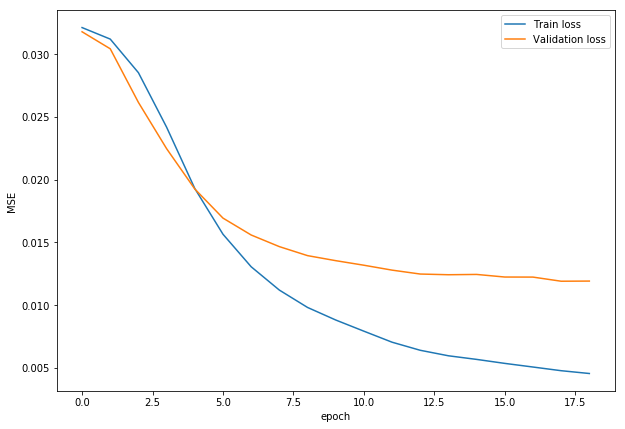

In [0]:
fig = plt.figure(figsize=(10, 7))
plt.plot(train_loss[1:], label='Train loss')
plt.plot(valid_loss[1:], label='Validation loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

In [0]:
# save model
# torch.save(autoencoder.state_dict(), str(trnpath/outpath/'autoencoder.pth'))
torch.save(autoencoder, str(trnpath/outpath/'autoencoder.pkl'))

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type LinearAutoencoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
!ls "{trnpath}"/{outpath}

autoencoder-3.pth  autoencoder.pkl  non  non-1	non-5  typ  typ-1  typ-5


In [0]:
# # Print model's state_dict
# print("Model's state_dict:")
# for param_tensor in autoencoder.state_dict():
#     print(param_tensor, "\t", autoencoder.state_dict()[param_tensor].size())

# # Print optimizer's state_dict
# print("Optimizer's state_dict:")
# for var_name in optimizer.state_dict():
#     print(var_name, "\t", optimizer.state_dict()[var_name])

## Distribution of MSE for anomalous images

In [0]:
#summary
autoencoder.eval()
for i,xb in enumerate(anom_loader):
    xb = xb.view(xb.size(0), -1) #for 1D to flatten image into vector
    xb = xb.cuda()
    yhb = autoencoder(xb)
    loss = loss_func(yhb, xb)
    print('Batch: {} \tvalid_loss: {:.6f}'.format(i, loss.item()))

Batch: 0 	valid_loss: 0.030880
Batch: 1 	valid_loss: 0.035706
Batch: 2 	valid_loss: 0.031395
Batch: 3 	valid_loss: 0.021264
Batch: 4 	valid_loss: 0.027587
Batch: 5 	valid_loss: 0.030276
Batch: 6 	valid_loss: 0.030853
Batch: 7 	valid_loss: 0.027458
Batch: 8 	valid_loss: 0.041971
Batch: 9 	valid_loss: 0.030131
Batch: 10 	valid_loss: 0.014170


mu_anom = 0.030547 	sig_anom = 0.011286


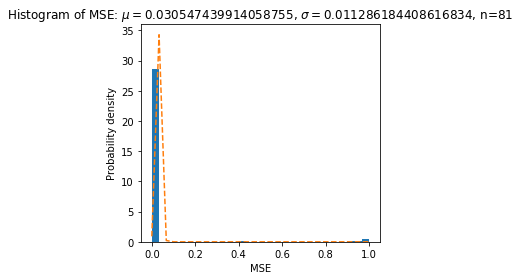

In [0]:
n_anom = 0
valid_losses = []
autoencoder.eval()
for i,xb in enumerate(anom_loader):
    xb = xb.view(xb.size(0), -1) #for 1D to flatten image into vector
    xb = xb.cuda()
    for x in xb:
      yh = autoencoder(x)
      loss = loss_func(yh, x)
      valid_losses.append(loss.item())
      n_anom += 1
      #print('Batch: {} \tvalid_loss: {:.6f}'.format(i, loss.item()))
      #print(f'{loss.item()}')
losses = np.array(valid_losses)
mu_anom,sig_anom = losses.mean(),losses.std()
print('mu_anom = {:.6f} \tsig_anom = {:.6f}'.format(mu_anom, sig_anom))
num_bins = 30

fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, num_bins, density=1)
y = ((1/(np.sqrt(2*np.pi)*sig_anom))*np.exp(-0.5*(1/sig_anom*(bins-mu_anom))**2)) #'best fit' line
ax.plot(bins, y, '--')
ax.set_xlabel('MSE')
ax.set_ylabel('Probability density')
ax.set_title(f'Histogram of MSE: $\mu={mu_anom}$, $\sigma={sig_anom}$, n={n_anom}')
fig.tight_layout() #Tweak spacing to prevent clipping of ylabel
plt.show()

In [0]:
print('mu_anom = {:.6f} \tsig_anom = {:.6f}'.format(mu_anom, sig_anom))

mu_anom = 0.030547 	sig_anom = 0.011286


## Distribution of MSE for normal validation images

In [0]:
#summary
autoencoder.eval()
for i,xb in enumerate(valid_norm_loader):
    xb = xb.view(xb.size(0), -1) #for 1D to flatten image into vector
    xb = xb.cuda()
    yhb = autoencoder(xb)
    loss = loss_func(yhb, xb)
    print('Batch: {} \tvalid_loss: {:.6f}'.format(i, loss.item()))

Batch: 0 	valid_loss: 0.014870
Batch: 1 	valid_loss: 0.008199
Batch: 2 	valid_loss: 0.011565
Batch: 3 	valid_loss: 0.009945
Batch: 4 	valid_loss: 0.010582
Batch: 5 	valid_loss: 0.014132
Batch: 6 	valid_loss: 0.011490
Batch: 7 	valid_loss: 0.010723
Batch: 8 	valid_loss: 0.013877
Batch: 9 	valid_loss: 0.016233
Batch: 10 	valid_loss: 0.011634
Batch: 11 	valid_loss: 0.009783


mu_norm = 0.011942 	sig_norm = 0.005277


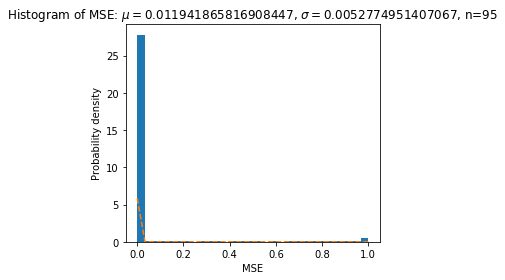

In [0]:
n_norm = 0
valid_losses = []
autoencoder.eval()
for i,xb in enumerate(valid_norm_loader):
    xb = xb.view(xb.size(0), -1) #for 1D to flatten image into vector
    xb = xb.cuda()
    for x in xb:
      yh = autoencoder(x)
      loss = loss_func(yh, x)
      valid_losses.append(loss.item())
      n_norm += 1
      #print('Batch: {} \tvalid_loss: {:.6f}'.format(i, loss.item()))
      #print(f'{loss.item()}')
losses = np.array(valid_losses)
mu_norm,sig_norm = losses.mean(),losses.std()
print('mu_norm = {:.6f} \tsig_norm = {:.6f}'.format(mu_norm, sig_norm))
num_bins = 30

fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, num_bins, density=1)
y = ((1/(np.sqrt(2*np.pi)*sig_norm))*np.exp(-0.5*(1/sig_norm*(bins-mu_norm))**2)) #'best fit' line
ax.plot(bins, y, '--')
ax.set_xlabel('MSE')
ax.set_ylabel('Probability density')
ax.set_title(f'Histogram of MSE: $\mu={mu_norm}$, $\sigma={sig_norm}$, n={n_norm}')
fig.tight_layout() #Tweak spacing to prevent clipping of ylabel
plt.show()

In [0]:
print('mu_norm = {:.6f} \tsig_norm = {:.6f}'.format(mu_norm, sig_norm))

mu_norm = 0.011942 	sig_norm = 0.005277


In [0]:
print('mu_anom = {:.6f} \tsig_anom = {:.6f}'.format(mu_anom, sig_anom))
print('mu_norm = {:.6f} \tsig_norm = {:.6f}'.format(mu_norm, sig_norm))

mu_anom = 0.030547 	sig_anom = 0.011286
mu_norm = 0.011942 	sig_norm = 0.005277


In [0]:
threshold = np.array([mu_anom, mu_norm]).mean(); threshold
print('threshold = {:.6f}'.format(threshold))

threshold = 0.021245


In [0]:
print('threshold = {:.6f}'.format(threshold))

threshold = 0.021245


## Show some reconstructions

In [0]:
def show_random_batch_reconstructions(loader):
  X = iter(loader).next(); print(X.shape)
  # X = X[0].unsqueeze(0); print(X.shape)
  X_flat = X.view(X.size(0), -1); print(X_flat.shape)
  Yh_flat = autoencoder(X_flat.cuda()); print(Yh_flat.shape)
  Yh = Yh_flat.view(X.size(0), 1, 128, 128); print(Yh.shape)

  # Yh = autoencoder(X.cuda()); print(Yh.shape)

  #prepare for visualization
  X_vis = X.numpy(); print(X_vis.shape)
  Yh_vis = Yh.detach().cpu().numpy(); print(Yh_vis.shape)
  #visualize; originals in top row, reconstructions in bottom row
  fig,axes = plt.subplots(nrows=2, ncols=8, sharex=True, sharey=True, figsize=(20,4))
  for X_vis,row in zip([X_vis, Yh_vis], axes):
    for img,ax in zip(X_vis, row):
      ax.imshow(np.squeeze(img), cmap='gray')
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)  

torch.Size([8, 1, 128, 128])
torch.Size([8, 16384])
torch.Size([8, 16384])
torch.Size([8, 1, 128, 128])
(8, 1, 128, 128)
(8, 1, 128, 128)


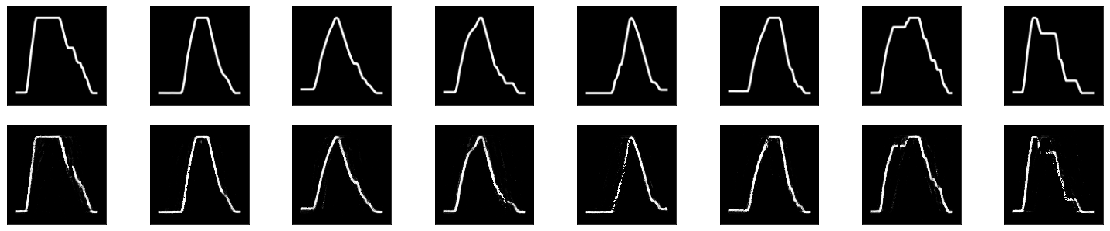

In [0]:
show_random_batch_reconstructions(train_norm_loader)

torch.Size([8, 1, 128, 128])
torch.Size([8, 16384])
torch.Size([8, 16384])
torch.Size([8, 1, 128, 128])
(8, 1, 128, 128)
(8, 1, 128, 128)


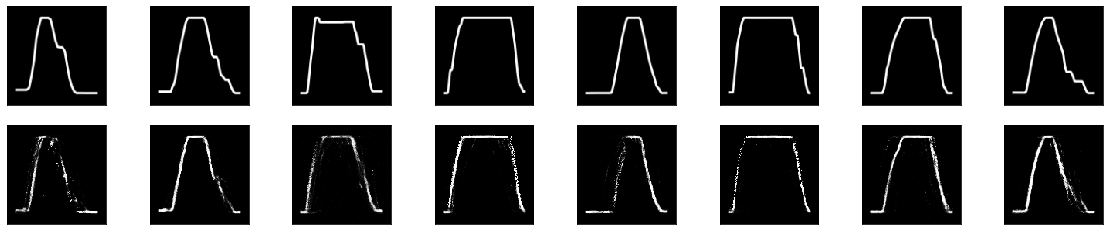

In [0]:
show_random_batch_reconstructions(valid_norm_loader)

torch.Size([8, 1, 128, 128])
torch.Size([8, 16384])
torch.Size([8, 16384])
torch.Size([8, 1, 128, 128])
(8, 1, 128, 128)
(8, 1, 128, 128)


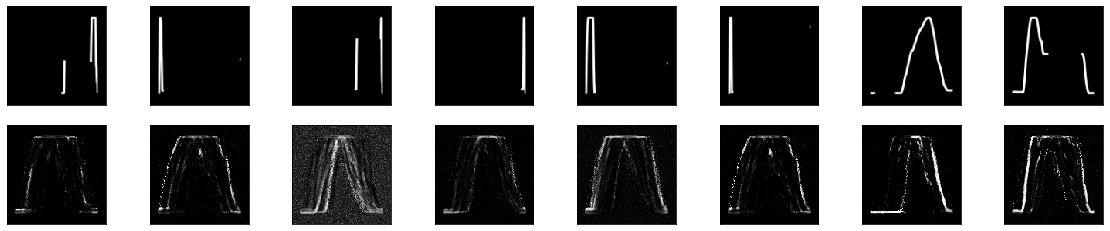

In [0]:
show_random_batch_reconstructions(anom_loader)